In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, text

# Configuration
DB_CONFIG = {
    "username": "agowen",  # Replace with your PostgreSQL username
    "password": "Capstone",  # Replace with your PostgreSQL password
    "host": "localhost",  # Replace with your PostgreSQL host
    "port": 5432,  # Replace with your PostgreSQL port (default: 5432)
    "database": "capstone",  # Replace with your PostgreSQL database name
}

# Connection string for PostgreSQL
CONN_STRING = f"postgresql://{DB_CONFIG['username']}:{DB_CONFIG['password']}@" \
              f"{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"

# Database setup
engine = create_engine(CONN_STRING)

def fetch_table_as_df(table_name):
    """
    Retrieves a table from the PostgreSQL database and returns it as a Pandas DataFrame.

    Parameters:
    - table_name (str): Name of the table to fetch.

    Returns:
    - Pandas DataFrame containing the table data.
    """
    try:
        with engine.connect() as connection:
            #query = text(f"SELECT * FROM {table_name};")

            query = text(f"SELECT SUBSTRING(cast(date as varchar),1,4) as year,SUBSTRING(cast(date as varchar),5,2) as month, global_land_temp, global_ocean_temp, co2_levels, region_name, weather_event_count FROM {table_name};")
            #query = text(f"SELECT global_land_temp, global_ocean_temp, co2_levels, region_name, weather_event_count FROM {table_name};")
            # Group months by season 
            #query = text(f"select year || '' || CASE WHEN month IN ('01', '02', '03') THEN '1' WHEN month IN ('04', '05', '06') THEN '2' WHEN month IN ('07', '08', '09') THEN '3' WHEN month IN ('10', '11', '12') THEN '4' END AS year_season, region_name, AVG(global_land_temp) as global_land_temp, AVG(global_ocean_temp) as global_ocean_temp, AVG(co2_levels) as co2_levels, SUM(weather_event_count) as weather_event_count from (select date, SUBSTRING(cast(date as varchar),1,4) as year,SUBSTRING(cast(date as varchar),5,2) as month, global_land_temp, global_ocean_temp, co2_levels, region_name, weather_event_count from {table_name}) group by 1,2;")
            df = pd.read_sql(query, connection)
            return df
    except Exception as e:
        print(f"Error: {e}")
        return None

def main():
    table_name = "_input_table"  # Replace with your actual table name
    df = fetch_table_as_df(table_name)
    
    if df is not None:
        print(df)

if __name__ == "__main__":
    main()


Error: (psycopg2.errors.UndefinedColumn) column "weather_event_count" does not exist
LINE 1: ...temp, global_ocean_temp, co2_levels, region_name, weather_ev...
                                                             ^

[SQL: SELECT SUBSTRING(cast(date as varchar),1,4) as year,SUBSTRING(cast(date as varchar),5,2) as month, global_land_temp, global_ocean_temp, co2_levels, region_name, weather_event_count FROM _input_table;]
(Background on this error at: https://sqlalche.me/e/20/f405)


       date  global_land_temp  global_ocean_temp  co2_levels
0    195001             -0.36              -0.12         NaN
1    195002             -0.39              -0.13         NaN
2    195003              0.02              -0.10         NaN
3    195004             -0.32              -0.10         NaN
4    195005              0.10              -0.04         NaN
..      ...               ...                ...         ...
895  202408              1.95               0.96      424.84
896  202409              1.94               0.96      425.43
897  202410              2.19               0.94      425.66
898  202411              2.26               0.91      425.86
899  202412              2.15               0.86      426.12

[900 rows x 4 columns]
        date  co2_levels
0 1950-01-01         NaN
1 1950-02-01         NaN
2 1950-03-01         NaN
3 1950-04-01         NaN
4 1950-05-01         NaN


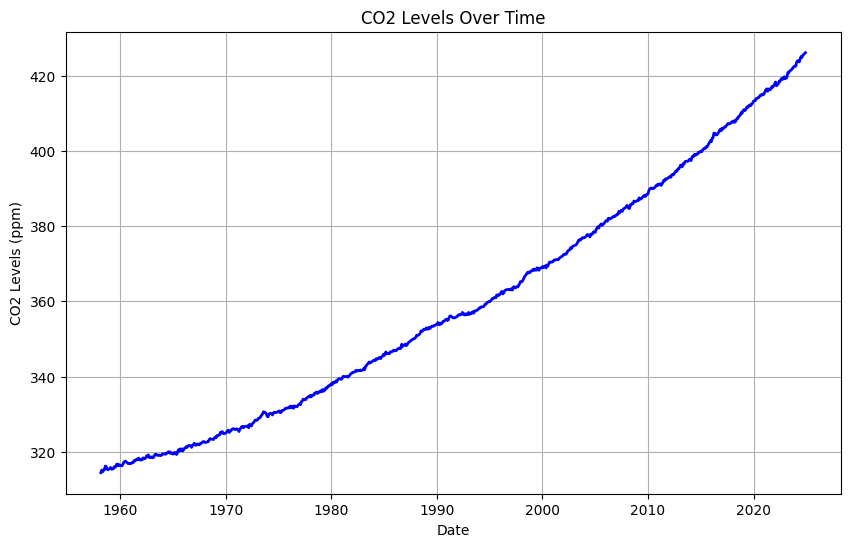

In [4]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine, text

# Configuration
DB_CONFIG = {
    "username": "agowen",  # Replace with your PostgreSQL username
    "password": "Capstone",  # Replace with your PostgreSQL password
    "host": "localhost",  # Replace with your PostgreSQL host
    "port": 5432,  # Replace with your PostgreSQL port (default: 5432)
    "database": "capstone",  # Replace with your PostgreSQL database name
}

# Connection string for PostgreSQL
CONN_STRING = f"postgresql://{DB_CONFIG['username']}:{DB_CONFIG['password']}@" \
              f"{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"

# Database setup
engine = create_engine(CONN_STRING)

def fetch_climate_change_table_as_df(table_name):
    """
    Retrieves a table from the PostgreSQL database and returns it as a Pandas DataFrame.
    Parameters:
    - table_name (str): Name of the table to fetch.
    Returns:
    - Pandas DataFrame containing the table data.
    """
    try:
        with engine.connect() as connection:
            query = text(f"SELECT * FROM {table_name};")
            df = pd.read_sql(query, connection)
            return df
    except Exception as e:
        print(f"Error: {e}")
        return None


def plot_co2_levels(df, date_column, co2_column):
    # Convert the date column to datetime format
    df[date_column] = pd.to_datetime(df[date_column].astype(str), format='%Y%m')
    
    # Print the data
    print(df[[date_column, co2_column]].head())
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df[date_column], df[co2_column], color='blue', linewidth=2)
    
    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('CO2 Levels (ppm)')
    plt.title('CO2 Levels Over Time')
    plt.grid(True)
    
    # Show the plot
    plt.show()


def main():
    table_name = "climate_change_data_combined"  # Replace with actual table name
    df_climate_change_data = fetch_climate_change_table_as_df(table_name)
    
    if df_climate_change_data is not None:
        print(df_climate_change_data)
        plot_co2_levels(df_climate_change_data, 'date', 'co2_levels')

    

if __name__ == "__main__":
    main()




# Example usage
# plot_co2_levels('co2_data.csv', 'date', 'co2_ppm')

    date  co2_levels
0   1968  323.045833
1   2010  390.101667
2   1979  336.835833
3   1962  318.447500
4   1997  363.876667
..   ...         ...
60  1983  343.151667
61  2002  373.451667
62  2006  382.090000
63  1995  360.965833
64  1964  319.613333

[65 rows x 2 columns]
    date  co2_levels
38  1960  316.906667
17  1961  317.638333
3   1962  318.447500
42  1963  318.987500
64  1964  319.613333


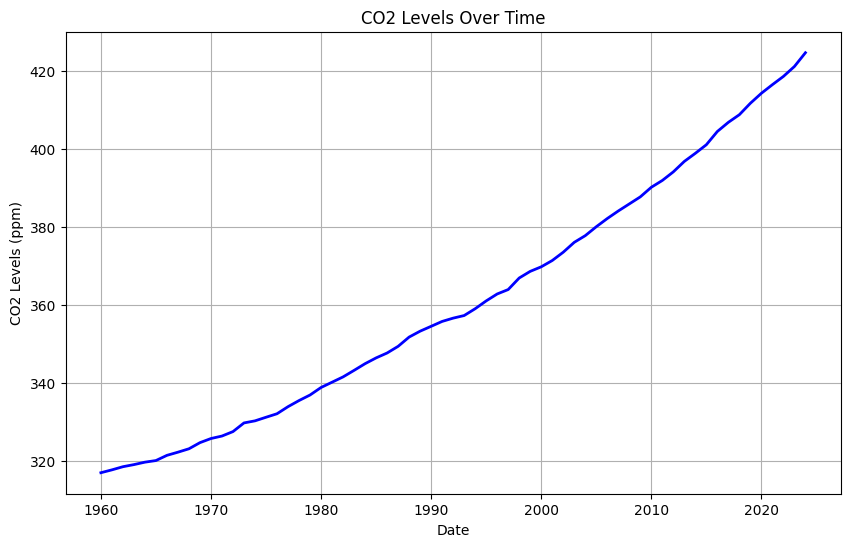

In [14]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine, text

# Configuration
DB_CONFIG = {
    "username": "agowen",  # Replace with your PostgreSQL username
    "password": "Capstone",  # Replace with your PostgreSQL password
    "host": "localhost",  # Replace with your PostgreSQL host
    "port": 5432,  # Replace with your PostgreSQL port (default: 5432)
    "database": "capstone",  # Replace with your PostgreSQL database name
}

# Connection string for PostgreSQL
CONN_STRING = f"postgresql://{DB_CONFIG['username']}:{DB_CONFIG['password']}@" \
              f"{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"

# Database setup
engine = create_engine(CONN_STRING)

def fetch_climate_change_table_as_df(table_name):
    """
    Retrieves a table from the PostgreSQL database and returns it as a Pandas DataFrame.
    Parameters:
    - table_name (str): Name of the table to fetch.
    Returns:
    - Pandas DataFrame containing the table data.
    """
    try:
        with engine.connect() as connection:
            query = text(f"select SUBSTRING(cast(date as varchar),1,4) as date, sum(co2_levels)/count(1) as co2_levels from {table_name} where date >= 196001 group by 1;")
            #query = text(f"SELECT * FROM {table_name};")
            df = pd.read_sql(query, connection)
            return df
    except Exception as e:
        print(f"Error: {e}")
        return None


def plot_co2_levels(df, date_column, co2_column):
    # Convert the date column to datetime format
    #df[date_column] = pd.to_datetime(df[date_column].astype(str), format='%Y%m')
    df[date_column] = df[date_column].astype(int)
    # Sort the DataFrame by year
    df = df.sort_values(by=date_column)

    # Print the data
    print(df[[date_column, co2_column]].head())
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df[date_column], df[co2_column], color='blue', linewidth=2)
    
    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('CO2 Levels (ppm)')
    plt.title('CO2 Levels Over Time')
    plt.grid(True)
    
    # Show the plot
    plt.show()


def main():
    table_name = "climate_change_data_combined"  # Replace with actual table name
    df_climate_change_data = fetch_climate_change_table_as_df(table_name)
    
    if df_climate_change_data is not None:
        print(df_climate_change_data)
        plot_co2_levels(df_climate_change_data, 'date', 'co2_levels')

    

if __name__ == "__main__":
    main()




# Example usage
# plot_co2_levels('co2_data.csv', 'date', 'co2_ppm')

       date  global_land_temp  global_ocean_temp  co2_levels
0    195001             -0.36              -0.12         NaN
1    195002             -0.39              -0.13         NaN
2    195003              0.02              -0.10         NaN
3    195004             -0.32              -0.10         NaN
4    195005              0.10              -0.04         NaN
..      ...               ...                ...         ...
895  202408              1.95               0.96      424.84
896  202409              1.94               0.96      425.43
897  202410              2.19               0.94      425.66
898  202411              2.26               0.91      425.86
899  202412              2.15               0.86      426.12

[900 rows x 4 columns]


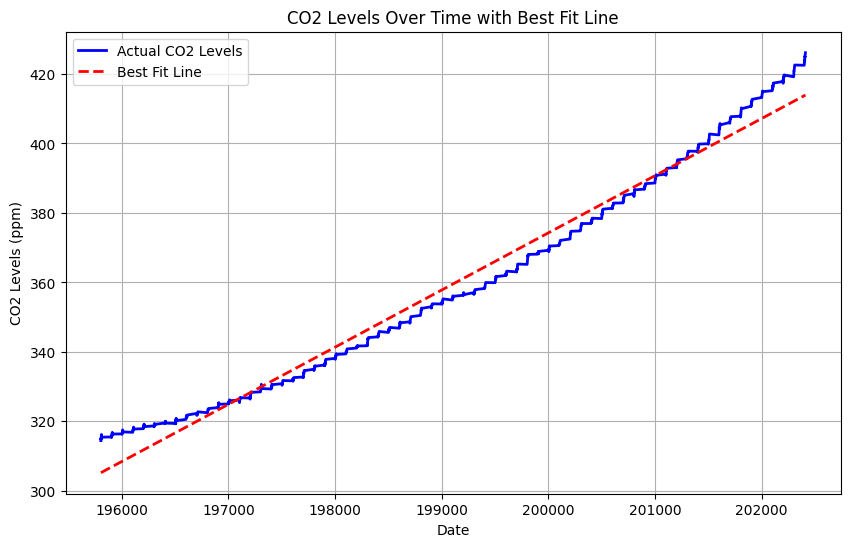

In [13]:
# BEST FIT LINE CO2 LEVELS 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine, text

# Configuration
DB_CONFIG = {
    "username": "agowen",  # Replace with your PostgreSQL username
    "password": "Capstone",  # Replace with your PostgreSQL password
    "host": "localhost",  # Replace with your PostgreSQL host
    "port": 5432,  # Replace with your PostgreSQL port (default: 5432)
    "database": "capstone",  # Replace with your PostgreSQL database name
}

# Connection string for PostgreSQL
CONN_STRING = f"postgresql://{DB_CONFIG['username']}:{DB_CONFIG['password']}@" \
              f"{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"

# Database setup
engine = create_engine(CONN_STRING)

def fetch_climate_change_table_as_df(table_name):
    try:
        with engine.connect() as connection:
            query = text(f"SELECT * FROM {table_name};")
            df = pd.read_sql(query, connection)
            return df
    except Exception as e:
        print(f"Error: {e}")
        return None

def best_fit_line(df, date_column, y_column):
    df_fit = df.copy()
    df_fit = df_fit.dropna(subset=[date_column, y_column])

    X = df_fit[[date_column]].values
    y = df_fit[y_column].values

    model = LinearRegression()
    model.fit(X, y)

    df_fit['best_fit_y'] = model.predict(X)

    return df_fit

def plot_co2_levels(df, date_column, co2_column):
    df_fit = best_fit_line(df, date_column, co2_column)
    
    plt.figure(figsize=(10, 6))
    plt.plot(df[date_column], df[co2_column], color='blue', linewidth=2, label='Actual CO2 Levels')
    plt.plot(df_fit[date_column], df_fit['best_fit_y'], color='red', linewidth=2, linestyle='--', label='Best Fit Line')

    plt.xlabel('Date')
    plt.ylabel('CO2 Levels (ppm)')
    plt.title('CO2 Levels Over Time with Best Fit Line')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    table_name = "climate_change_data_combined"  # Replace with actual table name
    df_climate_change_data = fetch_climate_change_table_as_df(table_name)
    
    if df_climate_change_data is not None:
        print(df_climate_change_data)
        plot_co2_levels(df_climate_change_data, 'date', 'co2_levels')

if __name__ == "__main__":
    main()


       date  global_land_temp  global_ocean_temp  co2_levels
0    195001             -0.36              -0.12         NaN
1    195002             -0.39              -0.13         NaN
2    195003              0.02              -0.10         NaN
3    195004             -0.32              -0.10         NaN
4    195005              0.10              -0.04         NaN
..      ...               ...                ...         ...
895  202408              1.95               0.96      424.84
896  202409              1.94               0.96      425.43
897  202410              2.19               0.94      425.66
898  202411              2.26               0.91      425.86
899  202412              2.15               0.86      426.12

[900 rows x 4 columns]
        date  global_land_temp
0 1950-01-01             -0.36
1 1950-02-01             -0.39
2 1950-03-01              0.02
3 1950-04-01             -0.32
4 1950-05-01              0.10


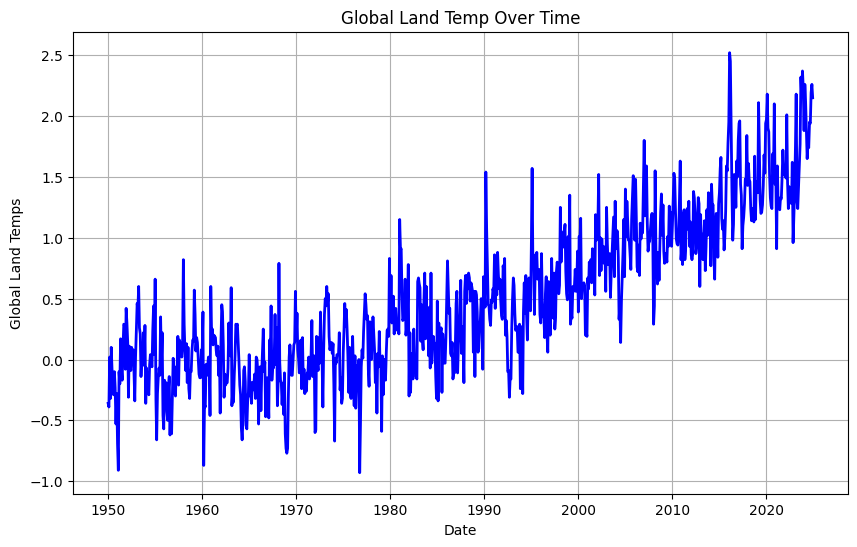

In [12]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine, text

# Configuration
DB_CONFIG = {
    "username": "agowen",  # Replace with your PostgreSQL username
    "password": "Capstone",  # Replace with your PostgreSQL password
    "host": "localhost",  # Replace with your PostgreSQL host
    "port": 5432,  # Replace with your PostgreSQL port (default: 5432)
    "database": "capstone",  # Replace with your PostgreSQL database name
}

# Connection string for PostgreSQL
CONN_STRING = f"postgresql://{DB_CONFIG['username']}:{DB_CONFIG['password']}@" \
              f"{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"

# Database setup
engine = create_engine(CONN_STRING)

def fetch_climate_change_table_as_df(table_name):
    """
    Retrieves a table from the PostgreSQL database and returns it as a Pandas DataFrame.
    Parameters:
    - table_name (str): Name of the table to fetch.
    Returns:
    - Pandas DataFrame containing the table data.
    """
    try:
        with engine.connect() as connection:
            query = text(f"SELECT * FROM {table_name};")
            #query = text(f"select SUBSTRING(cast(date as varchar),1,4) as date, sum(global_land_temp)/count(1) as global_land_temp from {table_name} where date >= 196001 group by 1;")
            df = pd.read_sql(query, connection)
            return df
    except Exception as e:
        print(f"Error: {e}")
        return None


def plot_co2_levels(df, date_column, co2_column):
    # Convert the date column to datetime format
    df[date_column] = pd.to_datetime(df[date_column].astype(str), format='%Y%m')
    
    # Print the data
    print(df[[date_column, co2_column]].head())
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df[date_column], df[co2_column], color='blue', linewidth=2)
    
    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Global Land Temps')
    plt.title('Global Land Temp Over Time')
    plt.grid(True)
    
    # Show the plot
    plt.show()


def main():
    table_name = "climate_change_data_combined"  # Replace with actual table name
    df_climate_change_data = fetch_climate_change_table_as_df(table_name)
    
    if df_climate_change_data is not None:
        print(df_climate_change_data)
        plot_co2_levels(df_climate_change_data, 'date', 'global_land_temp')

    

if __name__ == "__main__":
    main()




# Example usage
# plot_co2_levels('co2_data.csv', 'date', 'co2_ppm')

    date  global_land_temp
0   1968         -0.218333
1   2010          1.191667
2   1979          0.040000
3   1962          0.032500
4   1997          0.533333
..   ...               ...
60  1983          0.409167
61  2002          0.935833
62  2006          1.032500
63  1995          0.780833
64  1964         -0.357500

[65 rows x 2 columns]
    date  global_land_temp
38  1960         -0.102500
17  1961          0.070833
3   1962          0.032500
42  1963          0.042500
64  1964         -0.357500


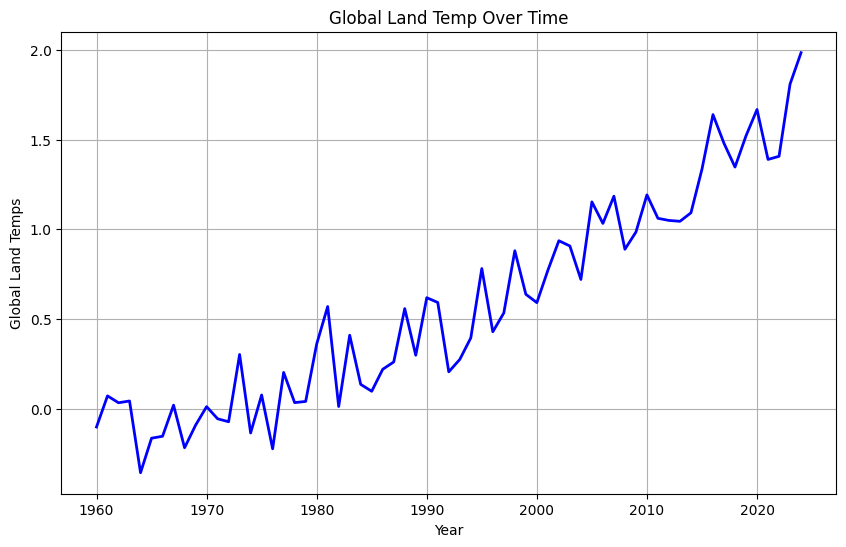

In [11]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine, text

# Configuration
DB_CONFIG = {
    "username": "agowen",  # Replace with your PostgreSQL username
    "password": "Capstone",  # Replace with your PostgreSQL password
    "host": "localhost",  # Replace with your PostgreSQL host
    "port": 5432,  # Replace with your PostgreSQL port (default: 5432)
    "database": "capstone",  # Replace with your PostgreSQL database name
}

# Connection string for PostgreSQL
CONN_STRING = f"postgresql://{DB_CONFIG['username']}:{DB_CONFIG['password']}@" \
              f"{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"

# Database setup
engine = create_engine(CONN_STRING)

def fetch_climate_change_table_as_df(table_name):
    """
    Retrieves a table from the PostgreSQL database and returns it as a Pandas DataFrame.
    Parameters:
    - table_name (str): Name of the table to fetch.
    Returns:
    - Pandas DataFrame containing the table data.
    """
    try:
        with engine.connect() as connection:
            #query = text(f"SELECT * FROM {table_name};")
            query = text(f"select SUBSTRING(cast(date as varchar),1,4) as date, sum(global_land_temp)/count(1) as global_land_temp from {table_name} where date >= 196001 group by 1;")
            df = pd.read_sql(query, connection)
            return df
    except Exception as e:
        print(f"Error: {e}")
        return None


def plot_co2_levels(df, date_column, co2_column):
    # Convert the date column to datetime format
    #df[date_column] = pd.to_datetime(df[date_column].astype(str), format='%Y%m')
    df[date_column] = df[date_column].astype(int)
    # Print the data
    # Sort the DataFrame by year
    df = df.sort_values(by=date_column)

    print(df[[date_column, co2_column]].head())
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df[date_column], df[co2_column], color='blue', linewidth=2)
    
    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel('Global Land Temps')
    plt.title('Global Land Temp Over Time')
    plt.grid(True)
    
    # Show the plot
    plt.show()


def main():
    table_name = "climate_change_data_combined"  # Replace with actual table name
    df_climate_change_data = fetch_climate_change_table_as_df(table_name)
    
    if df_climate_change_data is not None:
        print(df_climate_change_data)
        plot_co2_levels(df_climate_change_data, 'date', 'global_land_temp')

    

if __name__ == "__main__":
    main()




# Example usage
# plot_co2_levels('co2_data.csv', 'date', 'co2_ppm')

       date  global_land_temp  global_ocean_temp  co2_levels
0    196001              0.05               0.03      316.38
1    196002              0.39               0.04      316.33
2    196003             -0.87               0.04      316.27
3    196004             -0.37               0.01      316.70
4    196005             -0.39               0.08      317.19
..      ...               ...                ...         ...
775  202408              1.95               0.96      424.84
776  202409              1.94               0.96      425.43
777  202410              2.19               0.94      425.66
778  202411              2.26               0.91      425.86
779  202412              2.15               0.86      426.12

[780 rows x 4 columns]


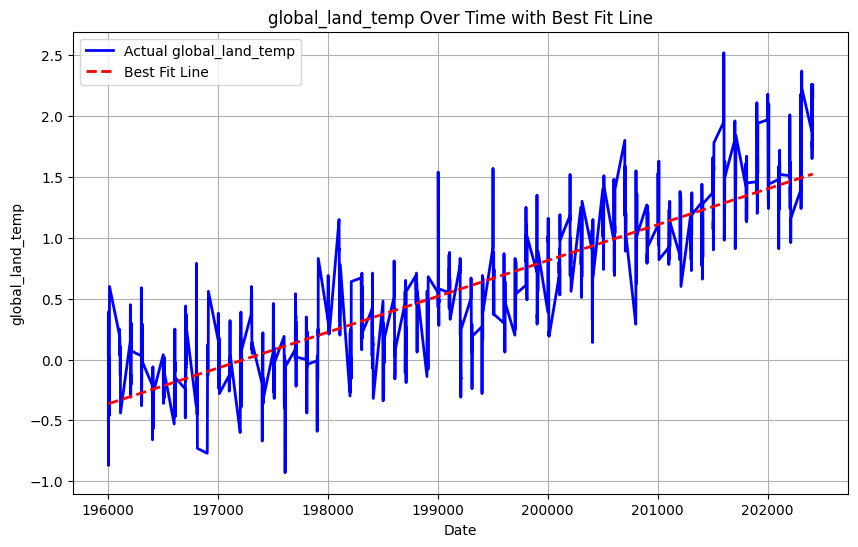

       date  global_land_temp  global_ocean_temp  co2_levels  best_fit_y
0    196001              0.05               0.03      316.38   -0.363870
1    196002              0.39               0.04      316.33   -0.363575
2    196003             -0.87               0.04      316.27   -0.363281
3    196004             -0.37               0.01      316.70   -0.362987
4    196005             -0.39               0.08      317.19   -0.362692
..      ...               ...                ...         ...         ...
775  202408              1.95               0.96      424.84    1.522333
776  202409              1.94               0.96      425.43    1.522628
777  202410              2.19               0.94      425.66    1.522922
778  202411              2.26               0.91      425.86    1.523216
779  202412              2.15               0.86      426.12    1.523511

[780 rows x 5 columns]


In [9]:
# BEST FIT LINE LAND TEMPS 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine, text

# Configuration
DB_CONFIG = {
    "username": "agowen",  # Replace with your PostgreSQL username
    "password": "Capstone",  # Replace with your PostgreSQL password
    "host": "localhost",  # Replace with your PostgreSQL host
    "port": 5432,  # Replace with your PostgreSQL port (default: 5432)
    "database": "capstone",  # Replace with your PostgreSQL database name
}

# Connection string for PostgreSQL
CONN_STRING = f"postgresql://{DB_CONFIG['username']}:{DB_CONFIG['password']}@" \
              f"{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"

# Database setup
engine = create_engine(CONN_STRING)

def fetch_climate_change_table_as_df(table_name):
    try:
        with engine.connect() as connection:
            query = text(f"SELECT * FROM {table_name} where date >= 196001;")
            df = pd.read_sql(query, connection)
            return df
    except Exception as e:
        print(f"Error: {e}")
        return None

def best_fit_line(df, date_column, y_column):
    df_fit = df.copy()
    df_fit = df_fit.dropna(subset=[date_column, y_column])

    X = df_fit[[date_column]].values
    y = df_fit[y_column].values

    model = LinearRegression()
    model.fit(X, y)

    df_fit['best_fit_y'] = model.predict(X)

    return df_fit

def plot_co2_levels(df, date_column, co2_column):
    df_fit = best_fit_line(df, date_column, co2_column)
    
    plt.figure(figsize=(10, 6))
    plt.plot(df[date_column], df[co2_column], color='blue', linewidth=2, label='Actual global_land_temp')
    plt.plot(df_fit[date_column], df_fit['best_fit_y'], color='red', linewidth=2, linestyle='--', label='Best Fit Line')

    plt.xlabel('Date')
    plt.ylabel('global_land_temp')
    plt.title('global_land_temp Over Time with Best Fit Line')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(df_fit)

def main():
    table_name = "climate_change_data_combined"  # Replace with actual table name
    df_climate_change_data = fetch_climate_change_table_as_df(table_name)
    
    if df_climate_change_data is not None:
        print(df_climate_change_data)
        plot_co2_levels(df_climate_change_data, 'date', 'global_land_temp')

if __name__ == "__main__":
    main()


       date  global_land_temp  global_ocean_temp  co2_levels
0    195001             -0.36              -0.12         NaN
1    195002             -0.39              -0.13         NaN
2    195003              0.02              -0.10         NaN
3    195004             -0.32              -0.10         NaN
4    195005              0.10              -0.04         NaN
..      ...               ...                ...         ...
895  202408              1.95               0.96      424.84
896  202409              1.94               0.96      425.43
897  202410              2.19               0.94      425.66
898  202411              2.26               0.91      425.86
899  202412              2.15               0.86      426.12

[900 rows x 4 columns]
        date  global_ocean_temp
0 1950-01-01              -0.12
1 1950-02-01              -0.13
2 1950-03-01              -0.10
3 1950-04-01              -0.10
4 1950-05-01              -0.04


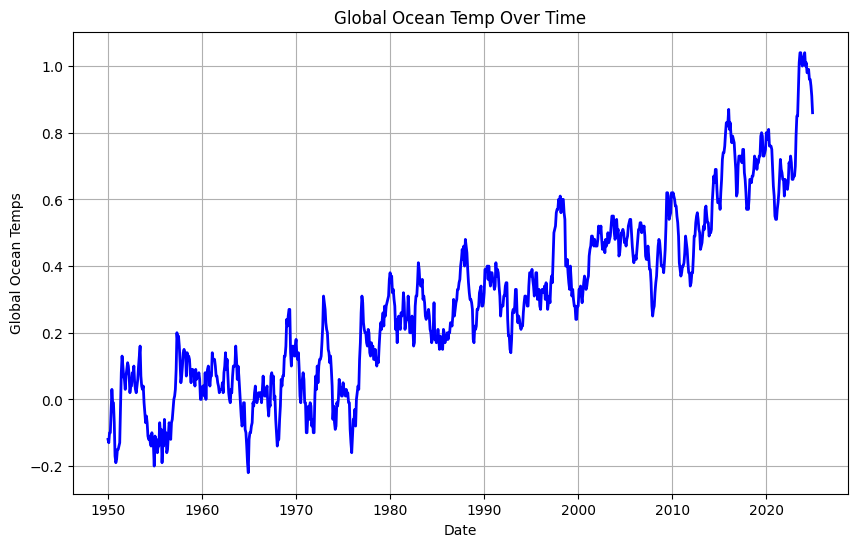

In [15]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine, text

# Configuration
DB_CONFIG = {
    "username": "agowen",  # Replace with your PostgreSQL username
    "password": "Capstone",  # Replace with your PostgreSQL password
    "host": "localhost",  # Replace with your PostgreSQL host
    "port": 5432,  # Replace with your PostgreSQL port (default: 5432)
    "database": "capstone",  # Replace with your PostgreSQL database name
}

# Connection string for PostgreSQL
CONN_STRING = f"postgresql://{DB_CONFIG['username']}:{DB_CONFIG['password']}@" \
              f"{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"

# Database setup
engine = create_engine(CONN_STRING)

def fetch_climate_change_table_as_df(table_name):
    """
    Retrieves a table from the PostgreSQL database and returns it as a Pandas DataFrame.
    Parameters:
    - table_name (str): Name of the table to fetch.
    Returns:
    - Pandas DataFrame containing the table data.
    """
    try:
        with engine.connect() as connection:
            query = text(f"SELECT * FROM {table_name};")
            df = pd.read_sql(query, connection)
            return df
    except Exception as e:
        print(f"Error: {e}")
        return None


def plot_co2_levels(df, date_column, co2_column):
    # Convert the date column to datetime format
    df[date_column] = pd.to_datetime(df[date_column].astype(str), format='%Y%m')
    
    # Print the data
    print(df[[date_column, co2_column]].head())
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df[date_column], df[co2_column], color='blue', linewidth=2)
    
    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Global Ocean Temps')
    plt.title('Global Ocean Temp Over Time')
    plt.grid(True)
    
    # Show the plot
    plt.show()


def main():
    table_name = "climate_change_data_combined"  # Replace with actual table name
    df_climate_change_data = fetch_climate_change_table_as_df(table_name)
    
    if df_climate_change_data is not None:
        print(df_climate_change_data)
        plot_co2_levels(df_climate_change_data, 'date', 'global_ocean_temp')

    

if __name__ == "__main__":
    main()




# Example usage
# plot_co2_levels('co2_data.csv', 'date', 'co2_ppm')

    date  global_ocean_temp
0   1968           0.016667
1   2010           0.528333
2   1979           0.269167
3   1962           0.062500
4   1997           0.467500
..   ...                ...
60  1983           0.319167
61  2002           0.480833
62  2006           0.485000
63  1995           0.340833
64  1964          -0.078333

[65 rows x 2 columns]
    date  global_ocean_temp
38  1960           0.053333
17  1961           0.079167
3   1962           0.062500
42  1963           0.076667
64  1964          -0.078333


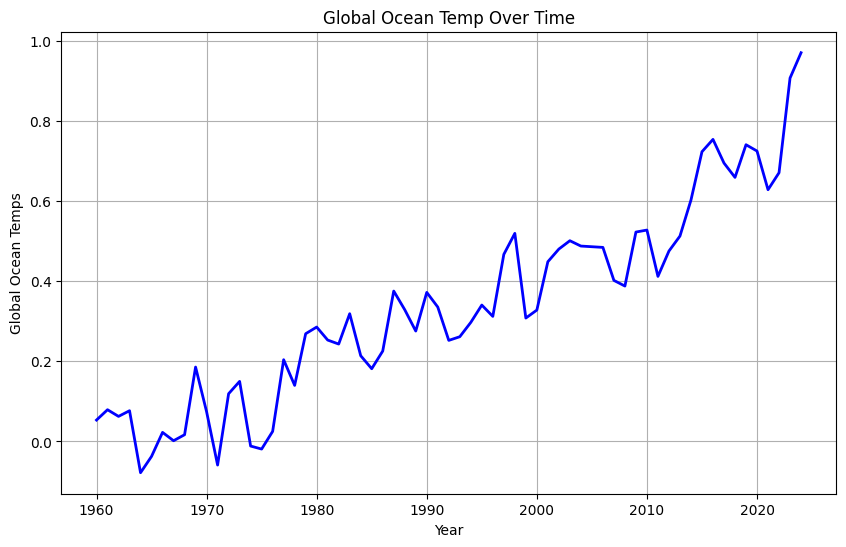

In [16]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine, text

# Configuration
DB_CONFIG = {
    "username": "agowen",  # Replace with your PostgreSQL username
    "password": "Capstone",  # Replace with your PostgreSQL password
    "host": "localhost",  # Replace with your PostgreSQL host
    "port": 5432,  # Replace with your PostgreSQL port (default: 5432)
    "database": "capstone",  # Replace with your PostgreSQL database name
}

# Connection string for PostgreSQL
CONN_STRING = f"postgresql://{DB_CONFIG['username']}:{DB_CONFIG['password']}@" \
              f"{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"

# Database setup
engine = create_engine(CONN_STRING)

def fetch_climate_change_table_as_df(table_name):
    """
    Retrieves a table from the PostgreSQL database and returns it as a Pandas DataFrame.
    Parameters:
    - table_name (str): Name of the table to fetch.
    Returns:
    - Pandas DataFrame containing the table data.
    """
    try:
        with engine.connect() as connection:
            #query = text(f"SELECT * FROM {table_name};")
            query = text(f"select SUBSTRING(cast(date as varchar),1,4) as date, sum(global_ocean_temp)/count(1) as global_ocean_temp from {table_name} where date >= 196001 group by 1;")
            
            df = pd.read_sql(query, connection)
            return df
    except Exception as e:
        print(f"Error: {e}")
        return None


def plot_co2_levels(df, date_column, co2_column):
    # Convert the date column to datetime format
    #df[date_column] = pd.to_datetime(df[date_column].astype(str), format='%Y%m')
    df[date_column] = df[date_column].astype(int)
    # Print the data
    # Sort the DataFrame by year
    df = df.sort_values(by=date_column)
    
    # Print the data
    print(df[[date_column, co2_column]].head())
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df[date_column], df[co2_column], color='blue', linewidth=2)
    
    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel('Global Ocean Temps')
    plt.title('Global Ocean Temp Over Time')
    plt.grid(True)
    
    # Show the plot
    plt.show()


def main():
    table_name = "climate_change_data_combined"  # Replace with actual table name
    df_climate_change_data = fetch_climate_change_table_as_df(table_name)
    
    if df_climate_change_data is not None:
        print(df_climate_change_data)
        plot_co2_levels(df_climate_change_data, 'date', 'global_ocean_temp')

    

if __name__ == "__main__":
    main()




# Example usage
# plot_co2_levels('co2_data.csv', 'date', 'co2_ppm')

       date  global_land_temp  global_ocean_temp  co2_levels
0    196001              0.05               0.03      316.38
1    196002              0.39               0.04      316.33
2    196003             -0.87               0.04      316.27
3    196004             -0.37               0.01      316.70
4    196005             -0.39               0.08      317.19
..      ...               ...                ...         ...
775  202408              1.95               0.96      424.84
776  202409              1.94               0.96      425.43
777  202410              2.19               0.94      425.66
778  202411              2.26               0.91      425.86
779  202412              2.15               0.86      426.12

[780 rows x 4 columns]


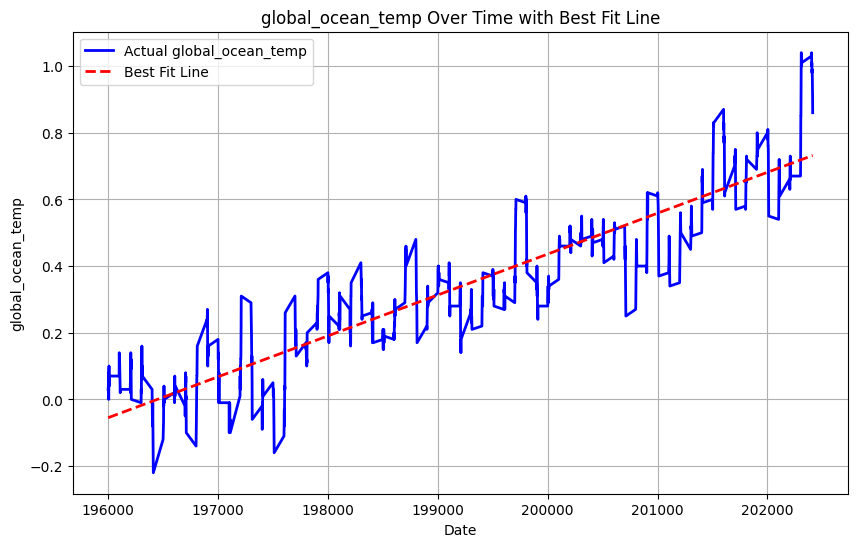

       date  global_land_temp  global_ocean_temp  co2_levels  best_fit_y
0    196001              0.05               0.03      316.38   -0.054943
1    196002              0.39               0.04      316.33   -0.054821
2    196003             -0.87               0.04      316.27   -0.054698
3    196004             -0.37               0.01      316.70   -0.054575
4    196005             -0.39               0.08      317.19   -0.054452
..      ...               ...                ...         ...         ...
775  202408              1.95               0.96      424.84    0.731324
776  202409              1.94               0.96      425.43    0.731447
777  202410              2.19               0.94      425.66    0.731570
778  202411              2.26               0.91      425.86    0.731692
779  202412              2.15               0.86      426.12    0.731815

[780 rows x 5 columns]


In [17]:
# BEST FIT LINE OCEAN TEMPS 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine, text

# Configuration
DB_CONFIG = {
    "username": "agowen",  # Replace with your PostgreSQL username
    "password": "Capstone",  # Replace with your PostgreSQL password
    "host": "localhost",  # Replace with your PostgreSQL host
    "port": 5432,  # Replace with your PostgreSQL port (default: 5432)
    "database": "capstone",  # Replace with your PostgreSQL database name
}

# Connection string for PostgreSQL
CONN_STRING = f"postgresql://{DB_CONFIG['username']}:{DB_CONFIG['password']}@" \
              f"{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"

# Database setup
engine = create_engine(CONN_STRING)

def fetch_climate_change_table_as_df(table_name):
    try:
        with engine.connect() as connection:
            query = text(f"SELECT * FROM {table_name} where date >= 196001;")
            df = pd.read_sql(query, connection)
            return df
    except Exception as e:
        print(f"Error: {e}")
        return None

def best_fit_line(df, date_column, y_column):
    df_fit = df.copy()
    df_fit = df_fit.dropna(subset=[date_column, y_column])

    X = df_fit[[date_column]].values
    y = df_fit[y_column].values

    model = LinearRegression()
    model.fit(X, y)

    df_fit['best_fit_y'] = model.predict(X)

    return df_fit

def plot_co2_levels(df, date_column, co2_column):
    df_fit = best_fit_line(df, date_column, co2_column)
    
    plt.figure(figsize=(10, 6))
    plt.plot(df[date_column], df[co2_column], color='blue', linewidth=2, label='Actual global_ocean_temp')
    plt.plot(df_fit[date_column], df_fit['best_fit_y'], color='red', linewidth=2, linestyle='--', label='Best Fit Line')

    plt.xlabel('Date')
    plt.ylabel('global_ocean_temp')
    plt.title('global_ocean_temp Over Time with Best Fit Line')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(df_fit)

def main():
    table_name = "climate_change_data_combined"  # Replace with actual table name
    df_climate_change_data = fetch_climate_change_table_as_df(table_name)
    
    if df_climate_change_data is not None:
        print(df_climate_change_data)
        plot_co2_levels(df_climate_change_data, 'date', 'global_ocean_temp')

if __name__ == "__main__":
    main()


In [12]:
# SCRIPT THAT CREATES THE BEST FIT CLIMATE CHANGE TABLES 

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine, text

# Configuration
DB_CONFIG = {
    "username": "agowen",  # Replace with your PostgreSQL username
    "password": "Capstone",  # Replace with your PostgreSQL password
    "host": "localhost",  # Replace with your PostgreSQL host
    "port": 5432,  # Replace with your PostgreSQL port (default: 5432)
    "database": "capstone_db_testing",  # Replace with your PostgreSQL database name
}

# Connection string for PostgreSQL
CONN_STRING = f"postgresql://{DB_CONFIG['username']}:{DB_CONFIG['password']}@" \
              f"{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"

# Database setup
engine = create_engine(CONN_STRING)

def fetch_climate_change_table_as_df(table_name):
    """
    Retrieves a table from the PostgreSQL database and returns it as a Pandas DataFrame.
    Parameters:
    - table_name (str): Name of the table to fetch.
    Returns:
    - Pandas DataFrame containing the table data.
    """
    try:
        with engine.connect() as connection:
            query = text(f"SELECT * FROM {table_name} where date >= 196001 and date <= 202012;")
            df = pd.read_sql(query, connection)
            return df
    except Exception as e:
        print(f"Error: {e}")
        return None

def best_fit_line(df, date_column, y_column):
    """
    Applies linear regression to the given data and returns the predicted values.
    """
    df_fit = df.copy()

    # Handle null values in the y column
    df_fit = df_fit.dropna(subset=[date_column,y_column])

    # Convert date to YYMM format if needed
    #df_fit['numeric_date'] = pd.to_datetime(df_fit[date_column].astype(str), errors='coerce').dt.strftime('%y%m').astype(float)

    # Reshape the date column to 2D array for LinearRegression
    #X = df_fit[['numeric_date']].values.reshape(-1, 1)
    X = df_fit[[date_column]].values
    y = df_fit[y_column].values

    model = LinearRegression()
    model.fit(X, y)

    # Add predictions as a new column
    df_fit[f'{y_column}_predicted'] = model.predict(X)

    return df_fit

def create_predictions_table(df, date_column, columns_to_predict, table_name):
    """
    Creates a new table in the database with the predicted values for each column.
    """
    # Apply linear regression for each column
    for column in columns_to_predict:
        df = best_fit_line(df, date_column, column)
    
    # Only keep the relevant columns (date and the predicted columns)
    result_df = df[[date_column] + [f"{col}_predicted" for col in columns_to_predict]]

    # Write the result dataframe to a new table in the database
    try:
        with engine.connect() as connection:
            result_df.to_sql(table_name, connection, if_exists='replace', index=False)
            print(f"Table '{table_name}' created successfully.")
    except Exception as e:
        print(f"Error creating table: {e}")

def main():
    table_name = "climate_change_data_complete"  # Replace with actual table name
    new_table_name = "climate_change_data_predictions"  # Replace with desired new table name
    df_climate_change_data = fetch_climate_change_table_as_df(table_name)
    
    if df_climate_change_data is not None:
        # Define the columns to predict
        columns_to_predict = ['global_land_temp', 'global_ocean_temp', 'co2_levels']
        
        # Create predictions and store them in the database
        create_predictions_table(df_climate_change_data, 'date', columns_to_predict, new_table_name)

if __name__ == "__main__":
    main()


Table 'climate_change_data_predictions' created successfully.


        date                  region_name  weather_event_count
0     196001                    Northeast                    0
1     196001  Northern Rockies and Plains                    0
2     196001                    Northwest                    0
3     196001                  Ohio Valley                    0
4     196001                        South                    0
...      ...                          ...                  ...
8944  202011  Northern Rockies and Plains                    0
8945  202011                    Northeast                    0
8946  202011  Northern Rockies and Plains                    0
8947  202011                    Northeast                    0
8948  202011  Northern Rockies and Plains                    0

[8949 rows x 3 columns]


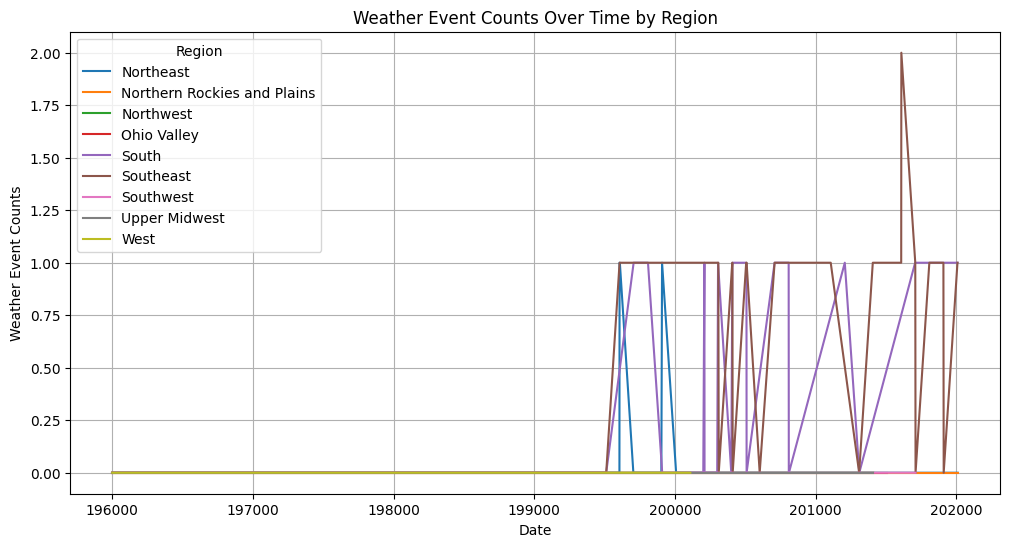

In [13]:
# GRAPH OF WEATHER EVENT COUNTS 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine, text

# Configuration
DB_CONFIG = {
    "username": "agowen",  # Replace with your PostgreSQL username
    "password": "Capstone",  # Replace with your PostgreSQL password
    "host": "localhost",  # Replace with your PostgreSQL host
    "port": 5432,  # Replace with your PostgreSQL port (default: 5432)
    "database": "capstone_db_testing",  # Replace with your PostgreSQL database name
}

# Connection string for PostgreSQL
CONN_STRING = f"postgresql://{DB_CONFIG['username']}:{DB_CONFIG['password']}@" \
              f"{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"

# Database setup
engine = create_engine(CONN_STRING)

def fetch_climate_change_table_as_df(table_name):
    try:
        with engine.connect() as connection:
            query = text(f"SELECT date, region_name, weather_event_count FROM {table_name} where date >= 196001;")
            df = pd.read_sql(query, connection)
            return df
    except Exception as e:
        print(f"Error: {e}")
        return None

def plot_weather_events(df, date_column, event_column, region_column):
    plt.figure(figsize=(12, 6))
    for region in df[region_column].unique():
        region_data = df[df[region_column] == region]
        plt.plot(region_data[date_column], region_data[event_column], label=region)
    
    plt.xlabel('Date')
    plt.ylabel('Weather Event Counts')
    plt.title('Weather Event Counts Over Time by Region')
    plt.legend(title="Region")
    plt.grid(True)
    plt.show()

def main():
    table_name = "_input_testing_table"  # Replace with actual table name
    df_climate_change_data = fetch_climate_change_table_as_df(table_name)
    
    if df_climate_change_data is not None:
        print(df_climate_change_data)
        plot_weather_events(df_climate_change_data, 'date', 'weather_event_count', 'region_name')

if __name__ == "__main__":
    main()


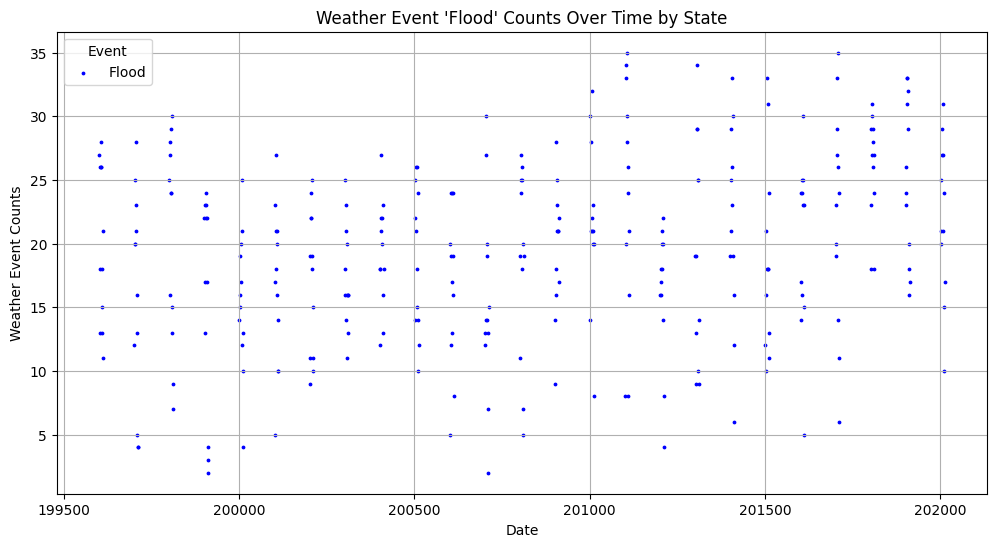

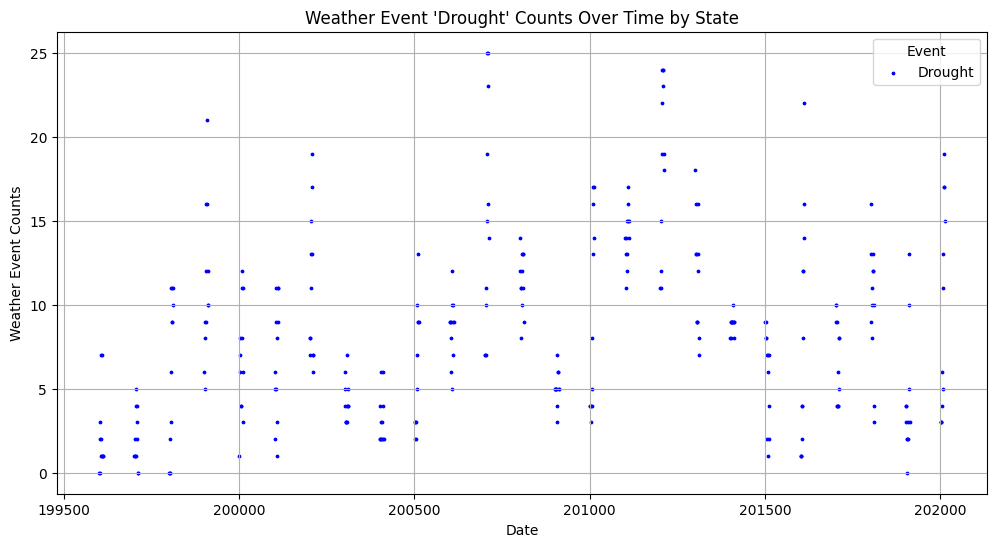

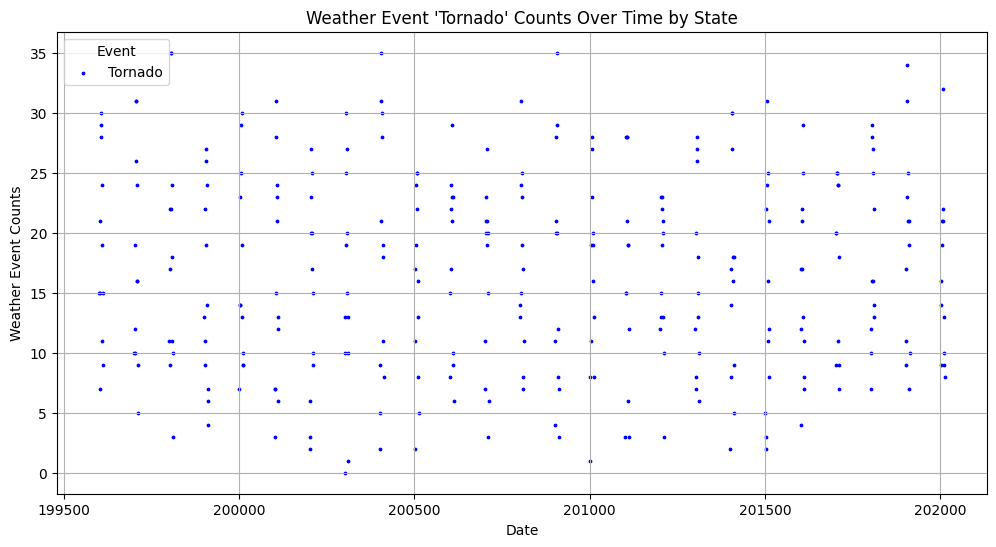

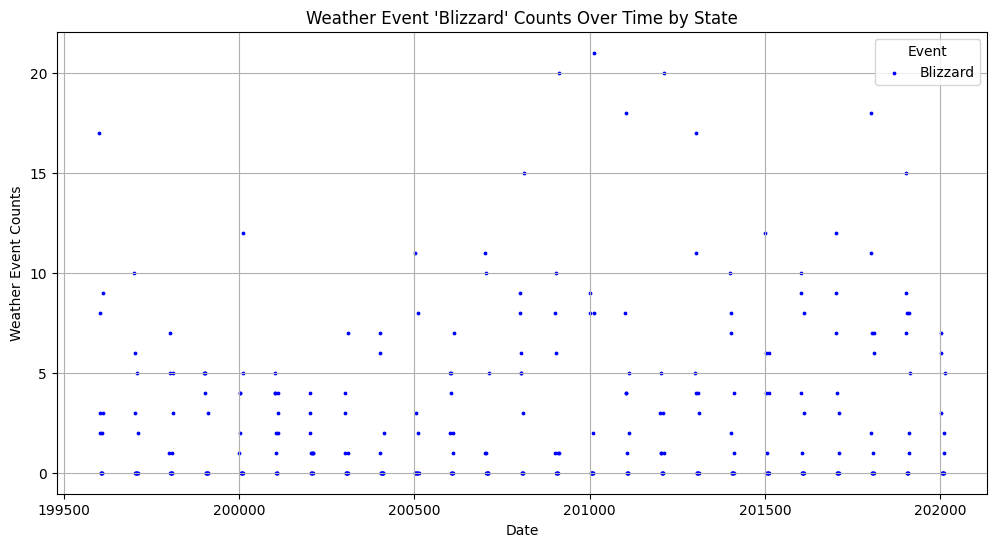

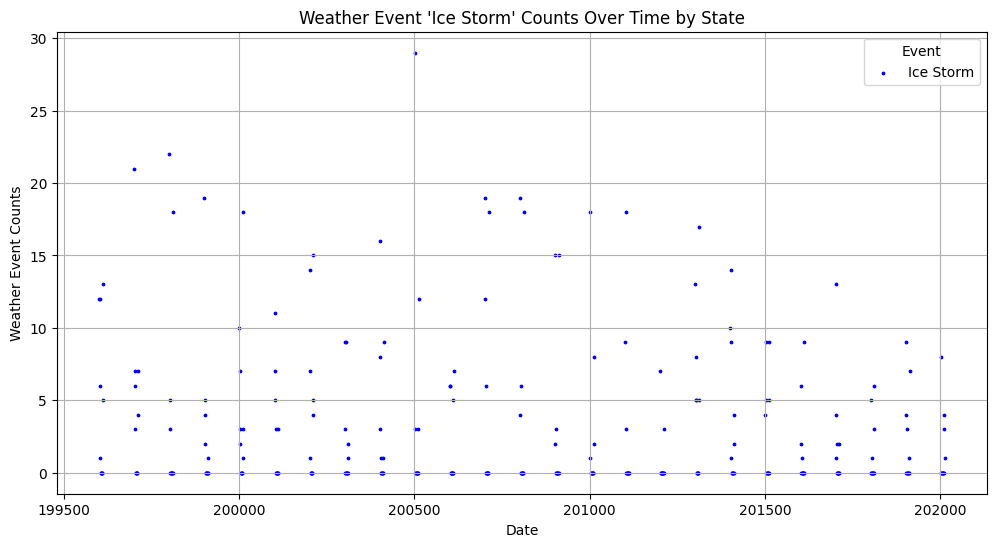

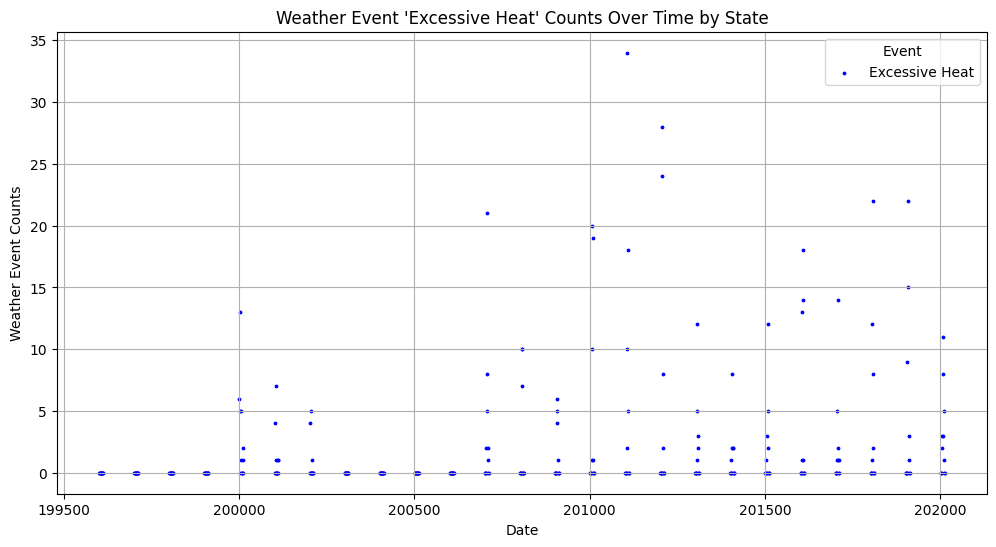

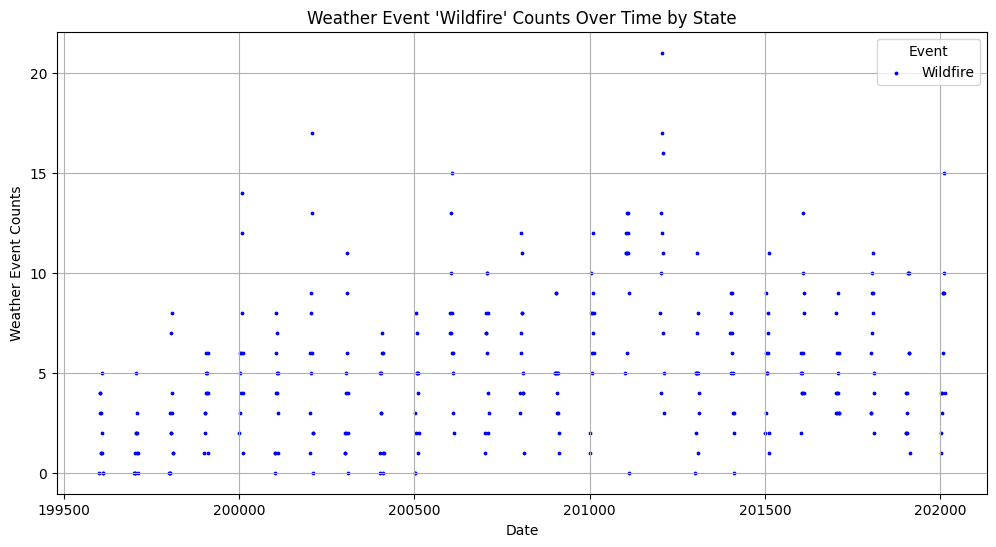

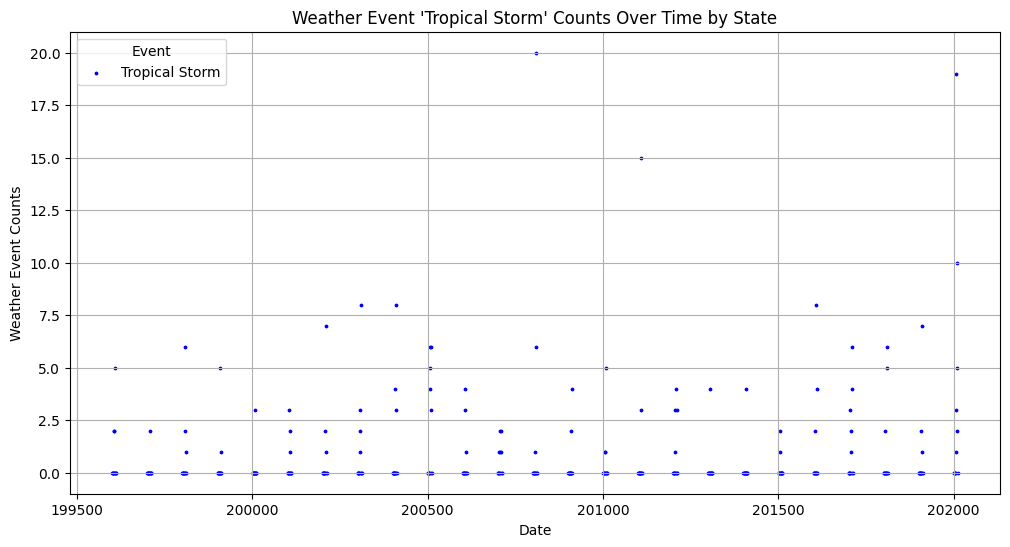

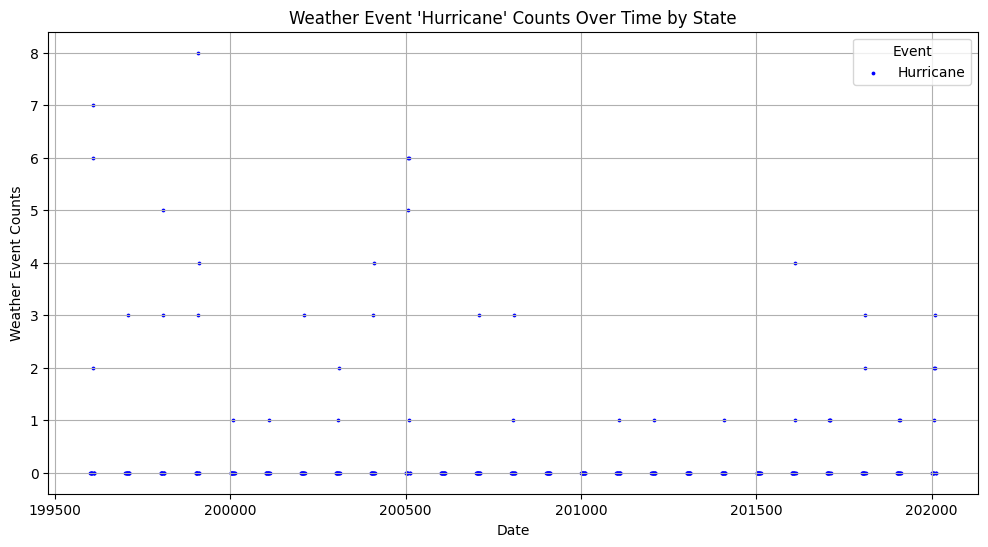

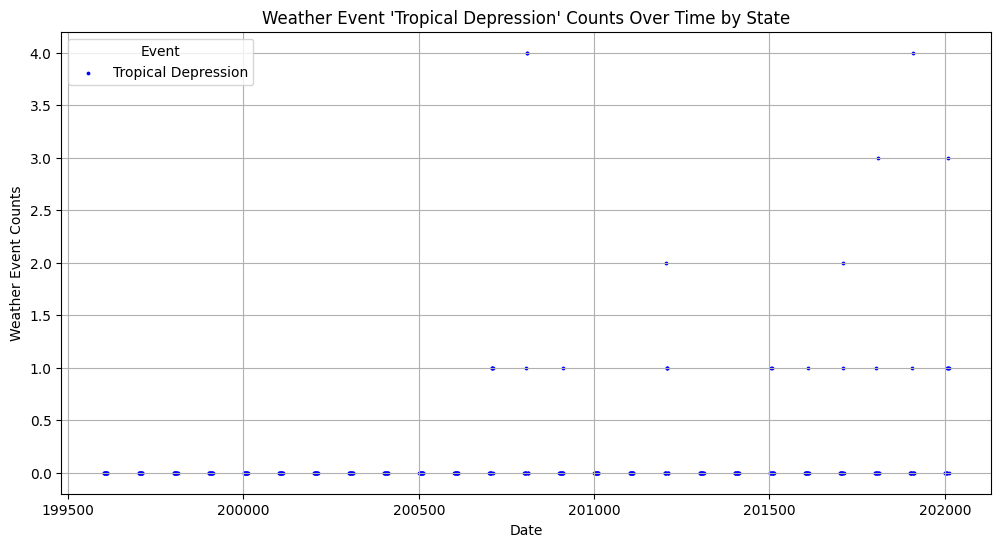

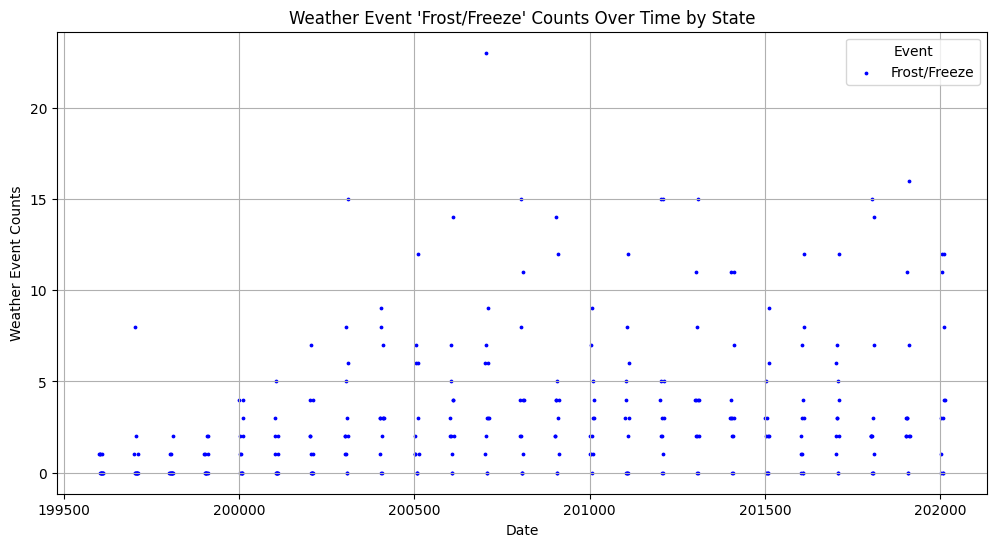

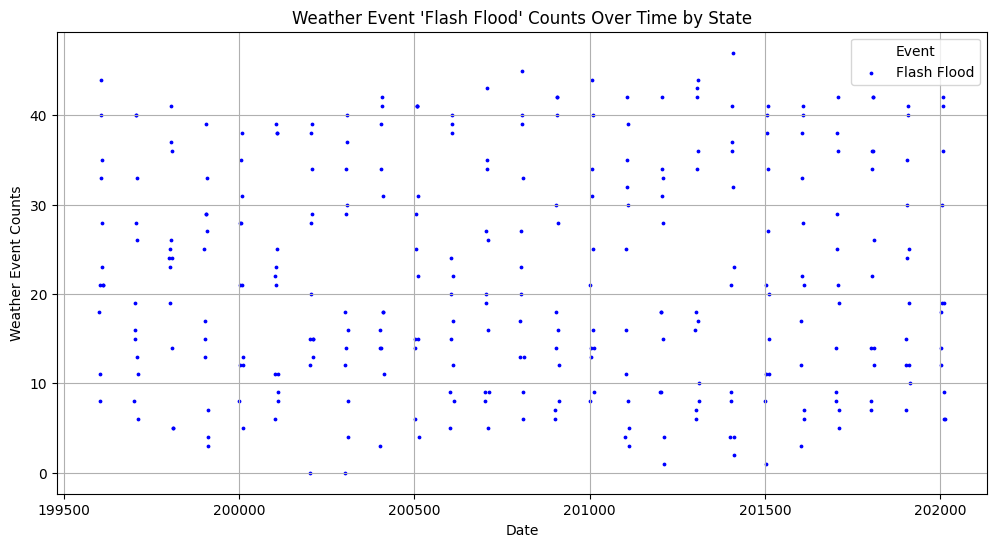

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine, text


# Configuration
DB_CONFIG = {
    "username": "agowen",  # Replace with your PostgreSQL username
    "password": "Capstone",  # Replace with your PostgreSQL password
    "host": "localhost",  # Replace with your PostgreSQL host
    "port": 5432,  # Replace with your PostgreSQL port (default: 5432)
    "database": "capstone_db_testing",  # Replace with your PostgreSQL database name
}

# Connection string for PostgreSQL
CONN_STRING = f"postgresql://{DB_CONFIG['username']}:{DB_CONFIG['password']}@" \
              f"{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"

# Database setup
engine = create_engine(CONN_STRING)

def fetch_table_as_df(table_name,weather_event_list):
    """
    Retrieves a table from the PostgreSQL database and returns it as a Pandas DataFrame.

    Parameters:
    - table_name (str): Name of the table to fetch.

    Returns:
    - Pandas DataFrame containing the table data.
    """
    try:
        with engine.connect() as connection:
            #query = text(f"SELECT * FROM {table_name};")

            query = text(f"""
            select date, sum(weather_event_count) as weather_event_count from (
select date,
       global_land_temp, 
       global_ocean_temp, 
       co2_levels, 
       state_code,  
       region_name,
       count(distinct(event_type)) as weather_event_count 
from {table_name}
where (event_type in ({weather_event_list}) or event_type is null) 
group by 1,2,3,4,5,6
) group by 1
;
        """)
            df = pd.read_sql(query, connection)
            return df
    except Exception as e:
        print(f"Error: {e}")
        return None


def plot_weather_events(df, date_column, event_column, region_column,event):
    plt.figure(figsize=(12, 6))
    #for region in df[region_column].unique():
    #    region_data = df[df[region_column] == region]
    region_data = df
    #plt.plot(region_data[date_column], region_data[event_column], label=event)
    plt.scatter(region_data[date_column], region_data[event_column], label=event, color='blue',s=3)
    plt.xlabel('Date')
    plt.ylabel('Weather Event Counts')
    plt.title(f"Weather Event '{event}' Counts Over Time by State")
    plt.legend(title="Event")
    plt.grid(True)
    plt.show()

def main():

    all_weather_events = [
        'Flood', 'Drought', 'Tornado', 'Blizzard', 'Ice Storm',
        'Excessive Heat', 'Wildfire', 'Tropical Storm',
        'Hurricane', 'Tropical Depression', 'Frost/Freeze', 'Flash Flood'
    ]
    for events in all_weather_events: 
        weather_events = f"('{events}')"
        table_name = "_input_table_1_dataset"  # Replace with actual table name
        df = fetch_table_as_df(table_name,weather_events)
    
        if df is not None:
            #print(df_climate_change_data)
            plot_weather_events(df, 'date', 'weather_event_count', 'state_code',events)


if __name__ == "__main__":
    main()
